In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import struct
import datetime 
import sys
print("Import Done")

Import Done


In [25]:
inFile = "../../logs/arise_logs/combined_sensors_data_UTC_2025-11-27.bin"
RECORD_STRUCT = struct.Struct('dff')
RECORD_SIZE = RECORD_STRUCT.size
timestamp = []
current = []
voltage = []
power = []

In [26]:

with open(inFile, 'rb') as f:  # 'rb' = read binary
    while True:
        # Read one chunk of data (16 bytes)
        chunk = f.read(RECORD_SIZE)
        
        # If the chunk is empty, we've reached the end of the file
        if not chunk:
            break
            
        # Make sure we got a full chunk (in case of a partial write)
        if len(chunk) == RECORD_SIZE:
            # Unpack the binary data back into Python values

            data = RECORD_STRUCT.unpack(chunk)
                    
            # Convert epoch timestamp to datetime object immediately
            dt_object = datetime.datetime.fromtimestamp(data[0], datetime.timezone.utc).replace(tzinfo=None)
            timestamp.append(dt_object)
            current.append(data[1])
            voltage.append(data[2])
            power.append(data[1]*data[2])
            




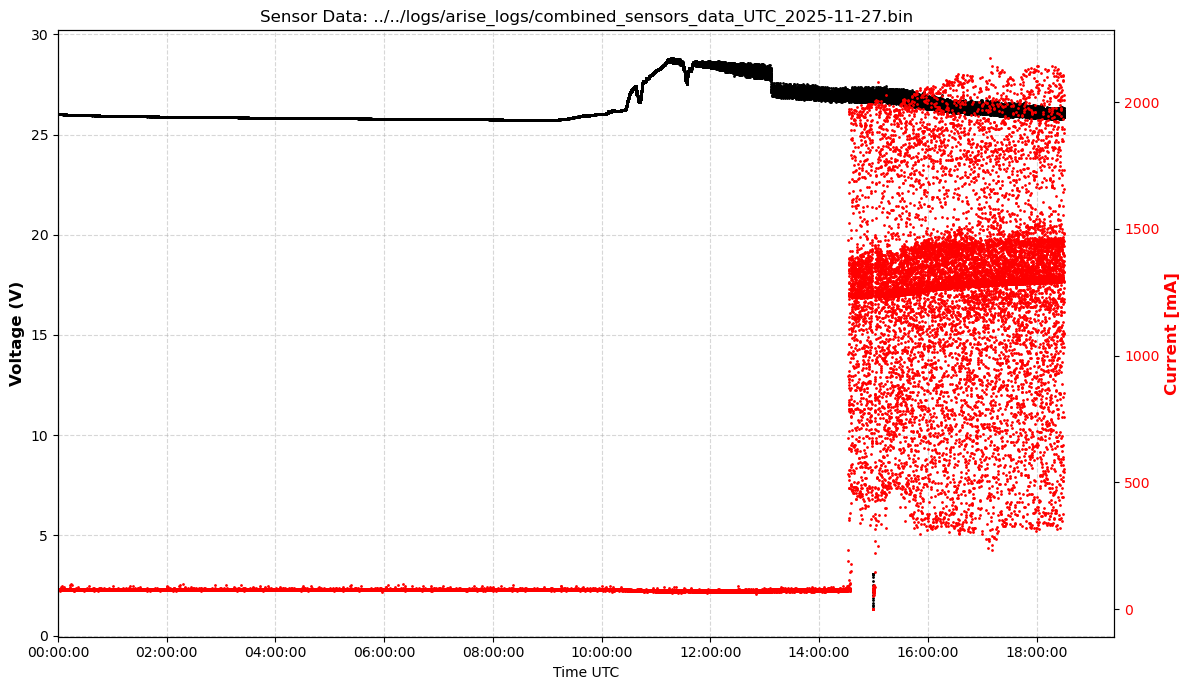

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 7))
color_volt = 'black'
color_curr = 'red'
    
base_date = timestamp[0].date()
start_str = "00:00:00"
st = datetime.datetime.strptime(start_str, "%H:%M:%S").time()
start_limit = datetime.datetime.combine(base_date, st)

end_str = "23:59:59"
et = datetime.datetime.strptime(end_str, "%H:%M:%S").time()
end_limit = datetime.datetime.combine(base_date, et)

plt.title(f'Sensor Data: {inFile}')
ax1.set_xlabel('Time UTC')
ax1.set_ylabel('Voltage (V)', color = color_volt, fontsize=12, fontweight='bold')
ax1.plot(timestamp, voltage, color= color_volt, marker = 'o', markersize = '1', linestyle='None', label='Voltage')
ax1.tick_params(axis='y', labelcolor=color_volt)
ax1.grid(True, linestyle='--', alpha=0.5)


ax2 = ax1.twinx()  

ax2.set_ylabel('Current [mA]', color=color_curr, fontsize=12, fontweight='bold')
ax2.plot(timestamp, current, color=color_curr,marker = 'o', markersize = '1', linestyle='None', label='Current')
ax2.tick_params(axis='y', labelcolor=color_curr)

date_formatter = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(date_formatter)


ax1.set_xlim(left=start_limit)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot window
plt.show()

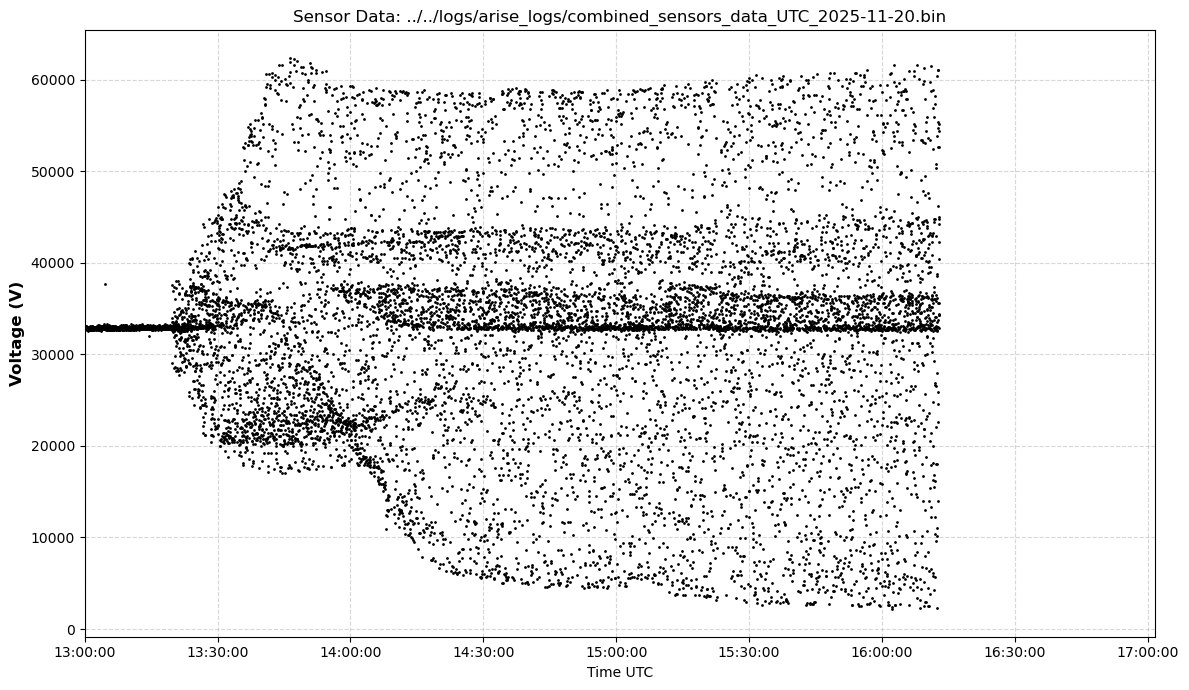

In [40]:
fig, ax1 = plt.subplots(figsize=(12, 7))
color_volt = 'black'
color_curr = 'red'
    
base_date = timestamp[0].date()
start_str = "13:00:00"
st = datetime.datetime.strptime(start_str, "%H:%M:%S").time()
start_limit = datetime.datetime.combine(base_date, st)

end_str = "23:59:59"
et = datetime.datetime.strptime(end_str, "%H:%M:%S").time()
end_limit = datetime.datetime.combine(base_date, et)

plt.title(f'Sensor Data: {inFile}')
ax1.set_xlabel('Time UTC')
ax1.set_ylabel('Voltage (V)', color = color_volt, fontsize=12, fontweight='bold')
ax1.plot(timestamp, power, color= color_volt, marker = 'o', markersize = '1', linestyle='None', label='Voltage')
ax1.tick_params(axis='y', labelcolor=color_volt)
ax1.grid(True, linestyle='--', alpha=0.5)



ax1.xaxis.set_major_formatter(date_formatter)


ax1.set_xlim(left=start_limit)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot window
plt.show()